<a href="https://colab.research.google.com/github/Indian-otaku/Introduction_To_PyTorch/blob/main/torchvision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary modules

In [145]:
import torch
from torch import nn
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [146]:
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


## Getting the data

In [147]:
from torchvision.transforms.transforms import ToTensor
train_data = FashionMNIST(root="data",
                          train=True,
                          transform=ToTensor(),
                          target_transform=None,
                          download=True)

test_data = FashionMNIST(root="data",
                         train=False,
                         transform=ToTensor(), 
                         target_transform=None,
                         download=True)

# train_data.classes 
# train_data.targets
# train_data.data

In [148]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [149]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [150]:
print("Train data size:",len(train_data))
print("Test data size:",len(test_data))

Train data size: 60000
Test data size: 10000


In [151]:
train_data[0][0].shape  # In the format [color channel, height, width]

torch.Size([1, 28, 28])

## Visualizing the data

So that we can become one with the data

(-0.5, 27.5, 27.5, -0.5)

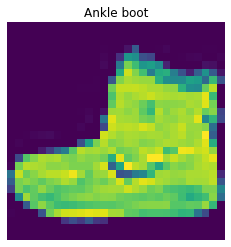

In [152]:
image, label = train_data[0]

plt.imshow(image.squeeze())
plt.title(train_data.classes[label])
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

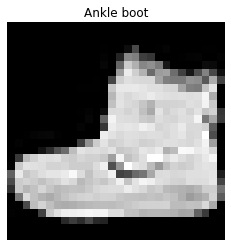

In [153]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)

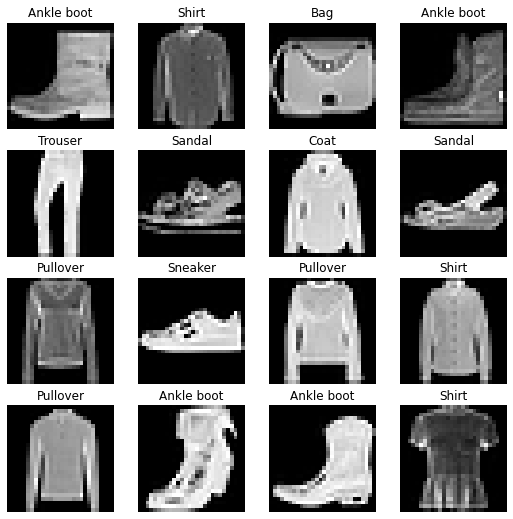

In [154]:
torch.manual_seed(42)
row, col = 4, 4
plt.figure(figsize=(9,9))

for i in range(1, row*col+1):
    rand_index = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[rand_index]

    plt.subplot(row, col, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis(False)

## Creating data loaders

In [155]:
BATCH_SIZE = 32

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True,
                               num_workers=2)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [156]:
print(f"Train dataloader size: {len(train_data_loader)} of batch size: {BATCH_SIZE}")
print(f"Test dataloader size: {len(test_data_loader)} of batch size: {BATCH_SIZE}")

Train dataloader size: 1875 of batch size: 32
Test dataloader size: 313 of batch size: 32


In [157]:
train_feature_batch, train_label_batch = next(iter(train_data_loader))
print(f"Train feature batch size: {train_feature_batch.shape} label batch size: {train_label_batch.shape}")

Train feature batch size: torch.Size([32, 1, 28, 28]) label batch size: torch.Size([32])


Image size: torch.Size([1, 28, 28]) Label size: torch.Size([])


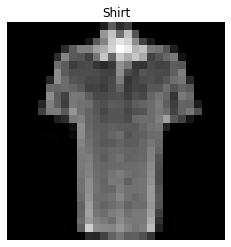

In [158]:
torch.manual_seed(42)

rand_index = torch.randint(0, len(train_feature_batch), size=[1]).item()

image, label = train_feature_batch[rand_index], train_label_batch[rand_index]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size: {image.shape} Label size: {label.shape}")

## Creating baseline model

In [159]:
class FMNISTModel0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units,
                      bias=True),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape,
                      bias=True)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [160]:
model0 = FMNISTModel0(input_shape=28*28,
                      hidden_units=10,
                      output_shape=len(train_data.classes)).to("cpu")
model0

FMNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [161]:
dummy_image = torch.randn(size=(1,1,28,28))
model0(dummy_image)

tensor([[-0.3547,  0.9163,  0.4637, -0.0154, -0.2025, -0.3041,  0.7347,  0.1754,
         -0.3721, -0.0304]], grad_fn=<AddmmBackward0>)

In [162]:
def accuracy_fn(y_pred, y_true):
    return (y_pred == y_true).sum().item()/ len(y_pred)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [163]:
from timeit import default_timer as timer

def print_train_time(start, end, device):
    total_time = end - start
    print(f"The total time taken using the {device} is {total_time:.3f}")
    return total_time


In [164]:
start = timer()

for i in range(121212):
    continue;

end = timer()

print_train_time(start, end, "cpu")

The total time taken using the cpu is 0.004


0.003931129999728

In [165]:
## Testing and training loop

# For creating a progress bar
from tqdm.auto import tqdm

epochs = 3   # Setting small values at beginning just to test the training loop before actual training

start = timer()

for epoch in tqdm(range(epochs)):
    
    train_loss = 0

    for batch, (X, y) in enumerate(train_data_loader):
        # Train loop
        model0.train()
        y_pred = model0(X)
        train_batch_loss = loss_fn(y_pred, y)
        train_loss += train_batch_loss

        model0.zero_grad()
        train_batch_loss.backward()
        optimizer.step()

        if batch%500 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_data_loader.dataset)} samples") 
            # len(train_data_loader.dataset) will give total number of observations in training data overall
        
    train_loss /= len(train_data_loader)    # len(train_data_loader) will give the batch size

    test_loss = 0
    test_acc = 0

    model0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            y_pred = model0(X_test)
            test_batch_loss = loss_fn(y_pred, y_test)
            test_loss += test_batch_loss
            test_acc += accuracy_fn(y_pred.argmax(dim=1), y_test)

        test_loss /= len(test_data_loader)
        test_acc /= len(test_data_loader)

    print(f"Train loss: {train_loss:.4f} Test loss: {test_loss:.4f} Test accuracy: {test_acc * 100:.3f}")

end = timer()

print_train_time(start, end, str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0 / 60000 samples
Looked at 16000 / 60000 samples
Looked at 32000 / 60000 samples
Looked at 48000 / 60000 samples
Train loss: 0.5917 Test loss: 0.5023 Test accuracy: 82.059
Looked at 0 / 60000 samples
Looked at 16000 / 60000 samples
Looked at 32000 / 60000 samples
Looked at 48000 / 60000 samples
Train loss: 0.4802 Test loss: 0.4731 Test accuracy: 83.247
Looked at 0 / 60000 samples
Looked at 16000 / 60000 samples
Looked at 32000 / 60000 samples
Looked at 48000 / 60000 samples
Train loss: 0.4567 Test loss: 0.4809 Test accuracy: 83.217
The total time taken using the cpu is 40.830


40.82973272599975

In [172]:
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn,
               accuracy_fn:torch.nn.Module):
    
    avg_loss = 0
    avg_acc = 0

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            acc = accuracy_fn(y_pred.argmax(dim=1), y)
            avg_loss += loss
            avg_acc += acc
    
        avg_loss /= len(data_loader)
        avg_acc /= len(data_loader)

    return {"Model_name":model.__class__.__name__,
            "Model_accuracy":avg_acc,
            "Model_loss":avg_loss.item()}

eval_model(model0, test_data_loader, loss_fn, accuracy_fn)

{'Model_name': 'FMNISTModel0',
 'Model_accuracy': 0.8321685303514377,
 'Model_loss': 0.4808827340602875}